# LGBTQ+ Rights with Country-Level Indicators

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
df_rights = pd.read_csv("../data/LGBTIQ-rights/gender-affirming-care/gender-affirming-care.csv")
df_gdp = pd.read_csv("../data/LGBTIQ-rights/gdp-per-capita/gdp-per-capita-worldbank.csv")

df_rights.rename(columns={"Gender-affirming care (historical)": "care_status"}, inplace=True)
df_gdp.rename(columns={"GDP per capita": "gdp_per_capita"}, inplace=True)
####
df = pd.merge(df_rights, df_gdp, on=["Entity", "Year"])


In [6]:
df.head()

,Entity,Code_x,Year,care_status,Code_y,"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2022,Banned,AFG,1981.7102
1,Afghanistan,AFG,2023,Banned,AFG,1992.4244
2,Andorra,AND,1996,Restricted,AND,46386.0900
3,Andorra,AND,1997,Restricted,AND,50032.3500
4,Andorra,AND,1998,Restricted,AND,51092.2230


# Average GDP by care status

<Axes: xlabel='care_status'>

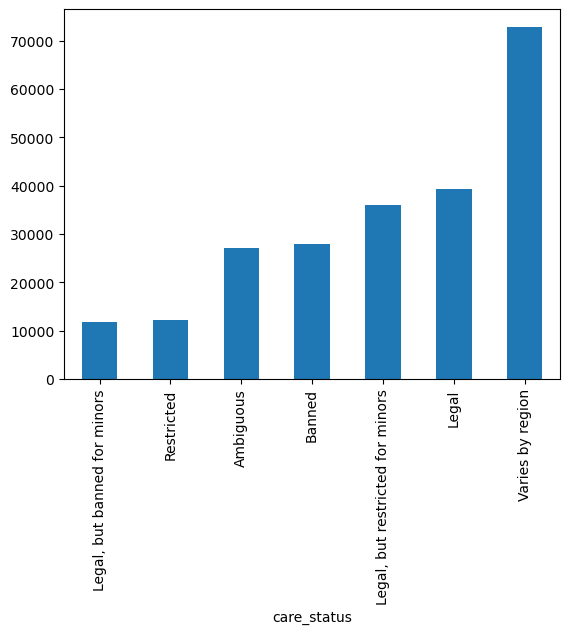

In [7]:
df.groupby("care_status")["GDP per capita, PPP (constant 2021 international $)"].mean().sort_values().plot(kind="bar")


# Boxplot of GDP per care category

<Axes: xlabel='care_status', ylabel='GDP per capita, PPP (constant 2021 international $)'>

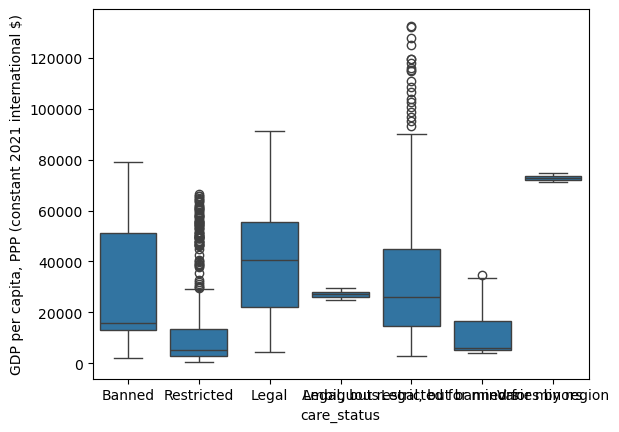

In [8]:
sns.boxplot(data=df, x="care_status", y="GDP per capita, PPP (constant 2021 international $)")

In [15]:
import os

folder_path = "../data/LGBTIQ-rights/"

# List all items in the folder
for item in os.listdir(folder_path):
    full_path = os.path.join(folder_path, item)
    if os.path.isdir(full_path):
        print(f"📁 Folder: {item}")
    else:
        print(f"📄 File:   {item}")


📁 Folder: censorship-of-lgbtiq-issues
📁 Folder: economic-inequality-gini-index
📁 Folder: employment-discrimination
📁 Folder: gdp-per-capita
📁 Folder: gender-affirming-care
📁 Folder: government-expenditure-on-education
📁 Folder: marriage-same-sex-partners
📄 File:   README.md
📁 Folder: right-to-change-legal-gender


In [16]:
import os
import pandas as pd

folder_path = "../data/LGBTIQ-rights/"

if not os.path.exists(folder_path):
    print("Folder not found:", folder_path)
else:
    items = os.listdir(folder_path)
    print("Top-level items:", items)

    for item in items:
        item_path = os.path.join(folder_path, item)

        # If it's a folder, check its contents
        if os.path.isdir(item_path):
            print(f"Checking folder: {item}")
            for subfile in os.listdir(item_path):
                subfile_path = os.path.join(item_path, subfile)
                if subfile.endswith(".csv"):
                    try:
                        df = pd.read_csv(subfile_path)
                        print(f"{item}/{subfile}: {len(df)} records")
                    except Exception as e:
                        print(f"{item}/{subfile}: Error reading CSV ({e})")
                elif subfile.endswith(".xlsx"):
                    try:
                        df = pd.read_excel(subfile_path)
                        print(f"{item}/{subfile}: {len(df)} records")
                    except Exception as e:
                        print(f"{item}/{subfile}: Error reading Excel ({e})")
                else:
                    print(f"{item}/{subfile}: Skipped (not CSV/XLSX)")
        else:
            print(f"{item}: Skipped (not a folder)")




Top-level items: ['censorship-of-lgbtiq-issues', 'economic-inequality-gini-index', 'employment-discrimination', 'gdp-per-capita', 'gender-affirming-care', 'government-expenditure-on-education', 'marriage-same-sex-partners', 'README.md', 'right-to-change-legal-gender']
Checking folder: censorship-of-lgbtiq-issues
censorship-of-lgbtiq-issues/censorship-of-lgbtiq-issues.csv: 1512 records
censorship-of-lgbtiq-issues/censorship-of-lgbtiq-issues.metadata.json: Skipped (not CSV/XLSX)
censorship-of-lgbtiq-issues/readme.md: Skipped (not CSV/XLSX)
Checking folder: economic-inequality-gini-index
economic-inequality-gini-index/economic-inequality-gini-index.csv: 2285 records
economic-inequality-gini-index/economic-inequality-gini-index.metadata.json: Skipped (not CSV/XLSX)
economic-inequality-gini-index/readme.md: Skipped (not CSV/XLSX)
Checking folder: employment-discrimination
employment-discrimination/employment-discrimination-lgbt-equaldex.csv: 1578 records
employment-discrimination/employment